### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

### Load and read datasets from local disk

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
mall_data = pd.read_csv('datasets/Mall_Customers.csv', 
                        names = ['Gender', 'Age', 'AnnualIncome', 'SpendingScore'],
                        index_col=0, header=1)

mall_data.head()

,Gender,Age,AnnualIncome,SpendingScore
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [3]:
mall_data.shape

(199, 4)

In [4]:
features = mall_data[['AnnualIncome', 'SpendingScore']]

features.head()

,AnnualIncome,SpendingScore
2,15,81
3,16,6
4,16,77
5,17,40
6,17,76


In [5]:
X = np.array(features)

X[:10]

array([[15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14]])

### Check, how many centroid are good for this cluster

https://medium.com/@ODSC/unsupervised-learning-evaluating-clusters-bd47eed175ce

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
possible_k_values = range(2, 50)

In [8]:
sum_of_squared_distances = []

for k in possible_k_values:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(X)

    sum_of_squared_distances.append(k_means.inertia_)
    
sum_of_squared_distances[:20]

[181023.87669294522,
 105373.18846928165,
 72749.98793276899,
 43972.8507048507,
 36758.209767627006,
 29817.147793410295,
 24554.994595259814,
 21567.66742728002,
 19403.13070882606,
 17368.070699267002,
 15611.499603695904,
 14392.26608485184,
 12757.341774891775,
 11456.410529163817,
 10749.877308027593,
 10067.808712601742,
 9362.947036921101,
 8355.368304159609,
 7959.968831168831,
 7503.517752737458]

### Draw graph between sum of square of distace vs number of cluster

https://medium.com/@ODSC/unsupervised-learning-evaluating-clusters-bd47eed175ce

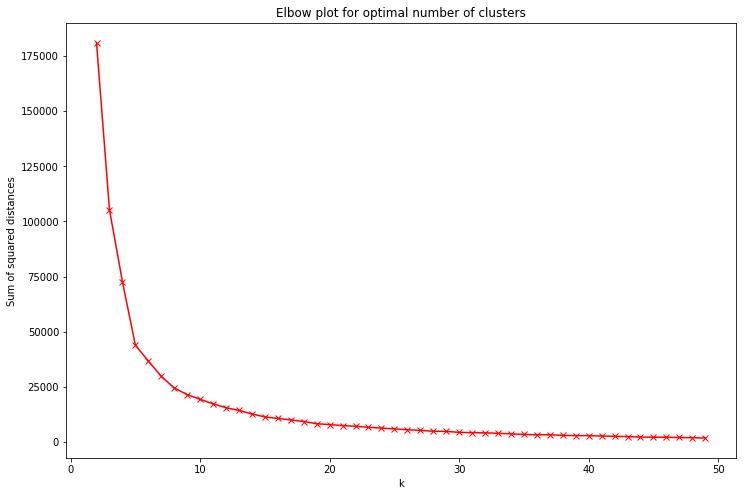

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(possible_k_values, sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')

plt.title('Elbow plot for optimal number of clusters')
plt.show()

### Silhouette score per k, As silhouette score are more as number of cluster are good.

In [10]:
scores_df = pd.DataFrame({'k_value' : possible_k_values,
                          'score' : sum_of_squared_distances})

scores_df.head(10)

,k_value,score
0,2,181023.876693
1,3,105373.188469
2,4,72749.987933
3,5,43972.850705
4,6,36758.209768
5,7,29817.147793
6,8,24554.994595
7,9,21567.667427
8,10,19403.130709
9,11,17368.070699


### Silhouette Score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#examples-using-sklearn-metrics-silhouette-score

__Compute the mean Silhouette Coefficient of all samples.__

__The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.__

In [11]:
def silhouette_score_kmeans(k, data):
    kmean = KMeans(n_clusters = k).fit(data)
    
    silhou_score = silhouette_score(data, kmean.labels_)

    return silhou_score

### Silhouette score per k value

In [12]:
silhouette_score_per_k = []

for k in possible_k_values:
    silhou_score = silhouette_score_kmeans(k, X)
    
    silhouette_score_per_k.append(silhou_score)
    
list(zip(possible_k_values,  silhouette_score_per_k))

[(2, 0.2946643879293517),
 (3, 0.46824208542590284),
 (4, 0.4970171432340684),
 (5, 0.5552295017995841),
 (6, 0.5409873241007619),
 (7, 0.5293467529575666),
 (8, 0.45993203944280786),
 (9, 0.45660529927120114),
 (10, 0.4422380543958117),
 (11, 0.43554006706682713),
 (12, 0.44823612153002146),
 (13, 0.42619063949793334),
 (14, 0.42778109087295885),
 (15, 0.4241798357914702),
 (16, 0.4275947929142733),
 (17, 0.4104608516757805),
 (18, 0.41535053858998977),
 (19, 0.4122513323563501),
 (20, 0.42718235025048884),
 (21, 0.4230435288135018),
 (22, 0.4142540479536087),
 (23, 0.42776537303819734),
 (24, 0.41569409473775026),
 (25, 0.4199778846197309),
 (26, 0.41919156712470834),
 (27, 0.3986629052276026),
 (28, 0.40497196108650535),
 (29, 0.42381359263729906),
 (30, 0.41951777794956935),
 (31, 0.40361751707923366),
 (32, 0.44946474323662367),
 (33, 0.42386962736692446),
 (34, 0.43831164842682235),
 (35, 0.4340230757455018),
 (36, 0.4334337228155371),
 (37, 0.4089976290014462),
 (38, 0.454875651

### Silhouette score per k value in dataframe formate

In [13]:
scores_df = pd.DataFrame({'k_value' : possible_k_values,
                          'score' : silhouette_score_per_k})

scores_df.head(10)

,k_value,score
0,2,0.294664
1,3,0.468242
2,4,0.497017
3,5,0.555230
4,6,0.540987
5,7,0.529347
6,8,0.459932
7,9,0.456605
8,10,0.442238
9,11,0.435540


In [14]:
scores_df.tail(10)

,k_value,score
38,40,0.443815
39,41,0.426437
40,42,0.434789
41,43,0.426163
42,44,0.414816
43,45,0.427499
44,46,0.420665
45,47,0.439762
46,48,0.424825
47,49,0.422873


### Graph between Silhouette score vs k_values

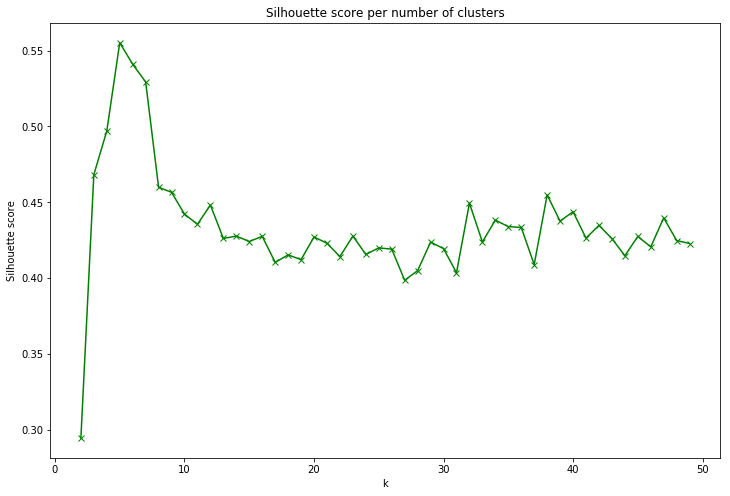

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(possible_k_values, silhouette_score_per_k, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.title('Silhouette score per number of clusters')
plt.show()

### Best k value and corresponding score

In [16]:
max_score_index = scores_df[scores_df['score'] == max(scores_df['score'])].index[0]

scores_df.iloc[max_score_index]

k_value    5.00000
score      0.55523
Name: 3, dtype: float64

In [17]:
best_k_value = int(scores_df.iloc[max_score_index].k_value)

best_k_value

5

### View dendrogram

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. Here we can see 5 cluster would be best for clustering.

In [18]:
from scipy.cluster import hierarchy

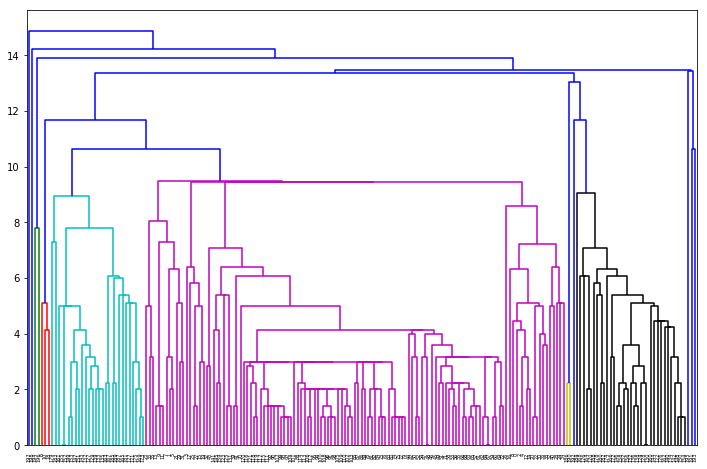

In [19]:
plt.figure(figsize=(12, 8))

hierarchy.dendrogram(hierarchy.linkage(X, method='single'))
plt.show()

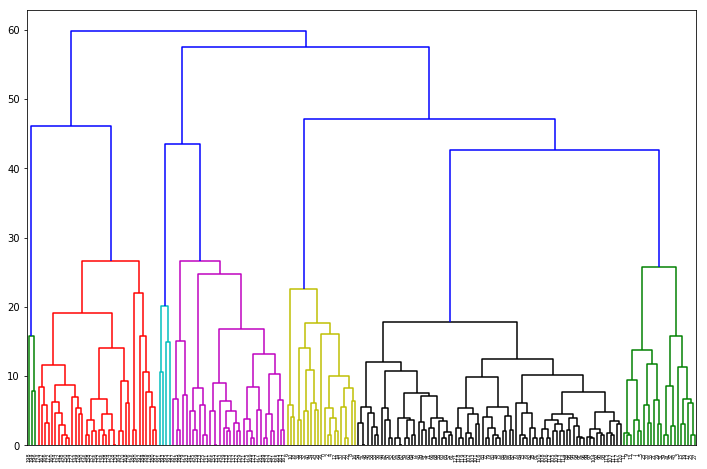

In [20]:
plt.figure(figsize=(12, 8))

hierarchy.dendrogram(hierarchy.linkage(X, method='average'))
plt.show()

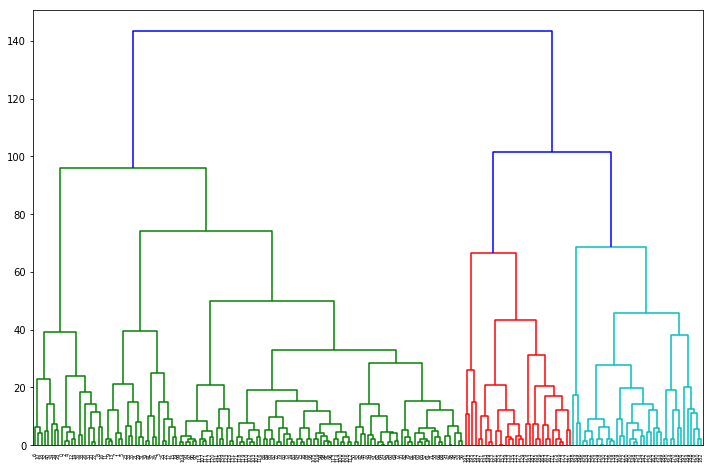

In [21]:
plt.figure(figsize=(12, 8))

hierarchy.dendrogram(hierarchy.linkage(X, method='complete'))
plt.show()

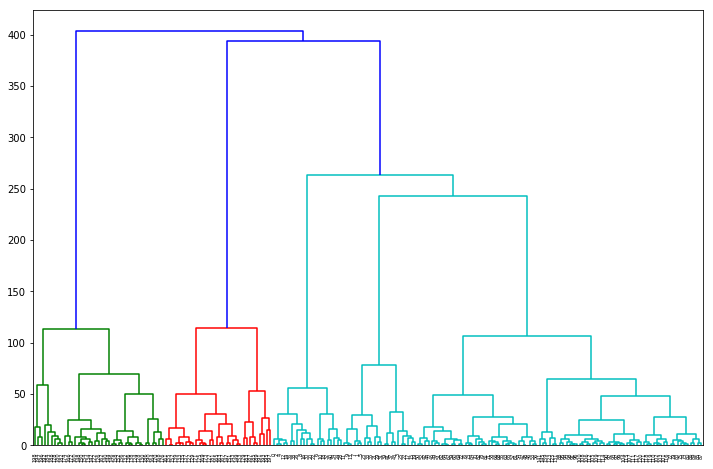

In [22]:
plt.figure(figsize=(12, 8))

hierarchy.dendrogram(hierarchy.linkage(X, method='ward'))
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

possible_k_values = range(2, 15)

def silhouette_score_agglomerative(k, data):
    agg = AgglomerativeClustering(n_clusters = k, linkage='ward').fit(data)
    
    silhou_score = silhouette_score(data, agg.labels_)

    return silhou_score

In [24]:
silhouette_score_per_k = []

for k in possible_k_values:
    silhou_score = silhouette_score_agglomerative(k, X)
    
    silhouette_score_per_k.append(silhou_score)

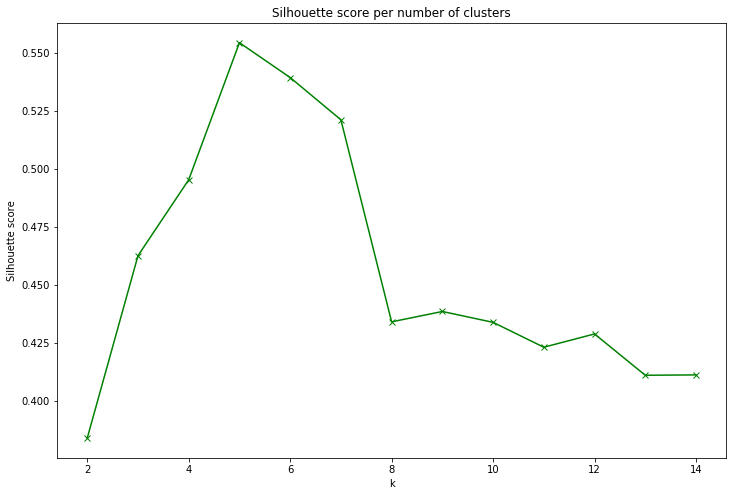

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(possible_k_values, silhouette_score_per_k, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.title('Silhouette score per number of clusters')
plt.show()

### MeanShift cluster algorithm

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [26]:
from sklearn.cluster import MeanShift

possible_bw_values = range(1, 30)

def silhouette_score_meanshift(bw, data):
    meanshift = MeanShift(bandwidth=bw).fit(data)
    
    silhou_score = silhouette_score(data, meanshift.labels_)

    return silhou_score

In [27]:
silhouette_score_per_bw = []

for bw in possible_bw_values:
    silhou_score = silhouette_score_meanshift(bw, X)
    
    silhouette_score_per_bw.append(silhou_score)

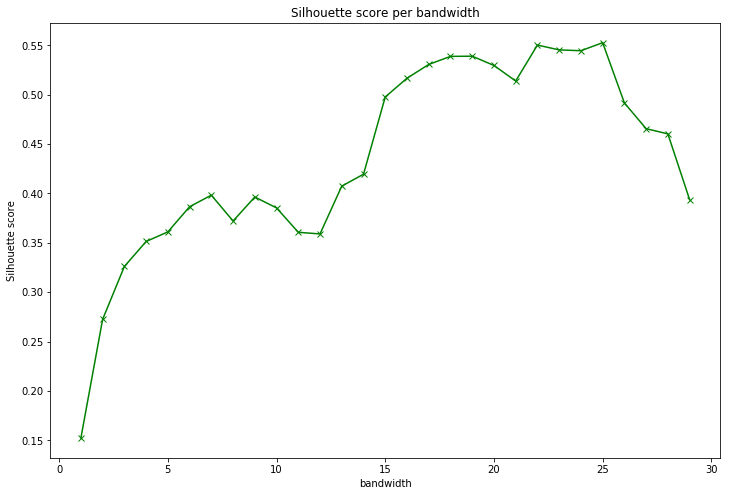

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(possible_bw_values, silhouette_score_per_bw, 'gx-')
plt.xlabel('bandwidth')
plt.ylabel('Silhouette score')

plt.title('Silhouette score per bandwidth')
plt.show()

### Estimate Bandwidth method for MeanShift clustering

In [29]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, n_samples=15)

bandwidth

27.322161642835603

In [30]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=bandwidth).fit(X)

In [31]:
centroids = meanshift.cluster_centers_

centroids

array([[54.95402299, 48.73563218],
       [78.02325581, 76.58139535],
       [80.86842105, 21.21052632]])

In [32]:
meanshift_labels = meanshift.labels_

meanshift_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1])

In [33]:
silhou_score = silhouette_score(X, meanshift_labels)

silhou_score

0.4625960894352593

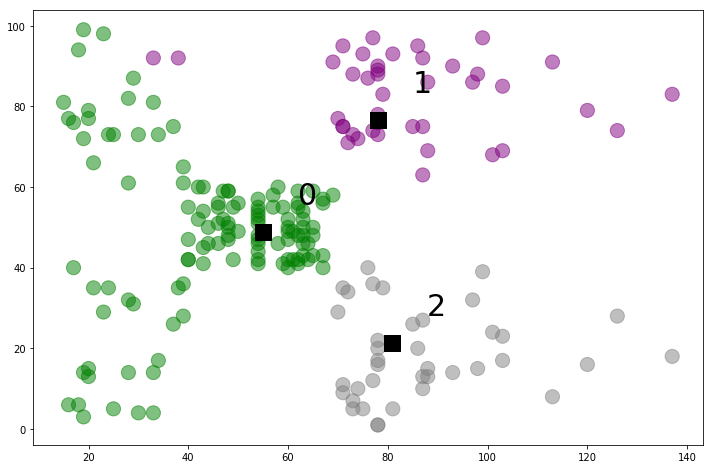

In [34]:
plt.figure(figsize=(12, 8))

colors = ['green', 'blue', 'purple', 'red', 'grey']

plt.scatter(features['AnnualIncome'], features['SpendingScore'], 
            s=200, c=meanshift_labels,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='k', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)